# Analysis of GDP (in current USD) Data for countries for years 1960-2014

### Libraries

In [15]:
# load the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
py.sign_in('','')
import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
# load the data (Data Source: WorldBank {https://data.worldbank.org})

gdp_current_usd = pd.read_csv("GDP_CurrentUSD.csv",index_col=[0,1], header=2)
cols = []

# select required columns

for i in range(1960,2015):
    cols.append(str(i))

gdp_current_usd = gdp_current_usd[cols[:len(cols)]]
gdp_current_usd = gdp_current_usd.reset_index()

country_metadata = pd.read_csv("Metadata_Country.csv", header=0, usecols=['Country Code','Region','IncomeGroup'])
country_metadata = country_metadata.dropna()

### Data Preprocessing

In [3]:
# merge the gdp data with country metadata to get only the countries and remove subgroups like Europe, Middle East etc

gdp_current_usd_metadata_merged = gdp_current_usd.merge(country_metadata,on=['Country Code'])
gdp_current_usd_metadata_merged = gdp_current_usd_metadata_merged.fillna(0)

In [4]:
# remove the unnecessary columns to get country and year wise gdp data

gdp_current_usd_country = gdp_current_usd_metadata_merged
gdp_current_usd_country = gdp_current_usd_country.set_index(['Country Name'])
gdp_current_usd_country = gdp_current_usd_country.drop(['Country Code','Region','IncomeGroup'], axis=1)
gdp_current_usd_country.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10
Angola,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11
Albania,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10
Andorra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.248215e+09,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,0.000000e+00


### Line Chart

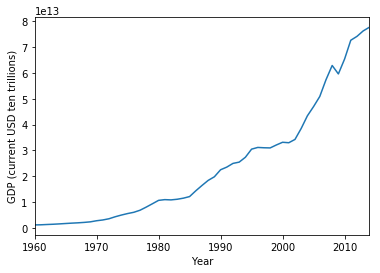

In [5]:
# plot gdp data for the world for 1960-2014

ax = gdp_current_usd_country.sum().plot()
ax.set_xlabel('Year')
ax.set_ylabel('GDP (current USD ten trillions)')
plt.show()

### Line Subplots

In [6]:
# for a given year, determine the countries with highest gdp

def top_gdp_current_usd(year, top=5):
    df = gdp_current_usd_country[year]
    df_sorted = df.sort_values(ascending=False)
    df_sorted = df_sorted.reset_index().head(top)
    df_sorted.index = df_sorted.index+1
    
    return df_sorted.round(2)

In [7]:
# function to draw subplots for countries for gdp data 1960-2014 

def subplots(topdf):
    
    # define the figure size
    plt.figure(figsize=(10, 20))
    
    # loop through dataframe to make subplots successively
    for i in range(len(topdf)):
        plt.subplot(len(topdf),2,i+1)
        ax =gdp_current_usd_country.loc[topdf.loc[i,'Country Name']].plot()
    # add axis labels and title 
        ax.set_xlabel("Year")
        ax.set_ylabel("GDP (current USD trillions)")
        plt.title(topdf.loc[i,'Country Name'])
    
    # define the layout and show the plot
    plt.tight_layout()
    plt.show()

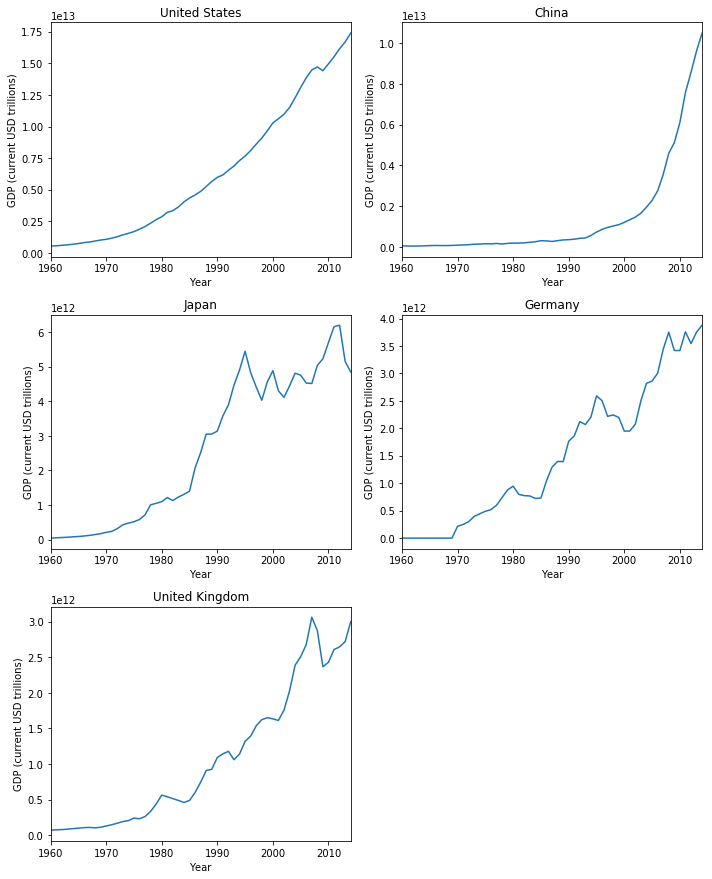

In [8]:
# draw subplots for 1960-2014 for countries with highest gdp of a given year

subplots(top_gdp_current_usd('2014',5).reset_index(drop=True))

### Overlaying Plots

In [9]:
# function to draw multi-line plots for gdp 1960-2014

def multilineplot(topdf):
    
    # define the figure size
    plt.figure(figsize=(15, 10))
    
    # loop through dataframe to make plots overlying
    for i in range(len(topdf)):
        gdp_current_usd_country.loc[topdf.loc[i,'Country Name']].plot()
           
    # add legends,axis labels and title
    plt.legend(loc='upper center')
    plt.xlabel('Year')
    plt.ylabel('GDP (current USD trillions)')
    plt.title('Comparative Chart of GDP (current USD ten trillions) for top countries ')
    
    plt.show()

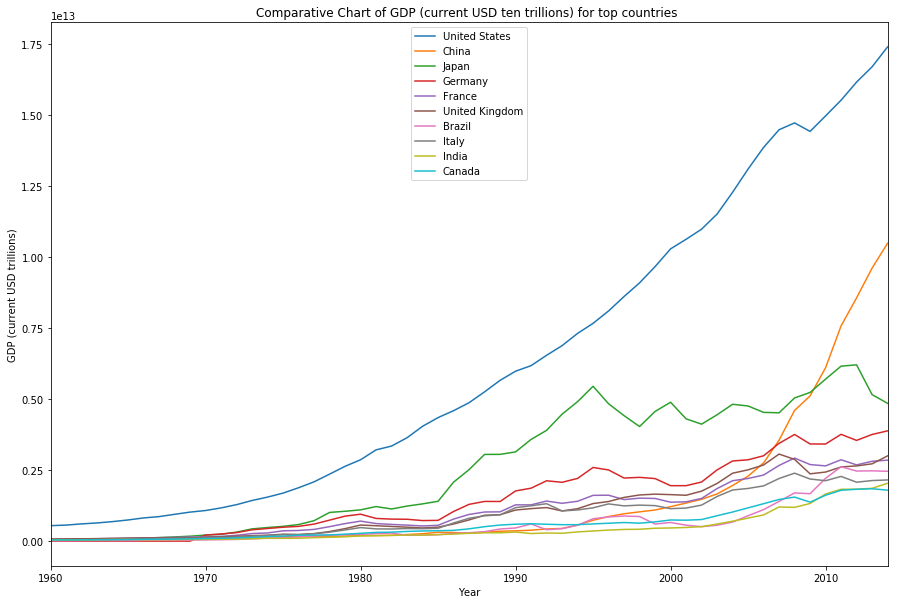

In [10]:
# draw overlying plots for 1960-2014 for countries having highest GDP for a given year 

multilineplot(top_gdp_current_usd('2010',10).reset_index(drop=True))

### Pie Subplots

In [11]:
# function to draw multi-year pie charts for GDP (current USD trillions)

def multiyearpie(numyear=2):
    
    # define the figure size
    plt.figure(figsize=(12, 18))
    
    # get the total number of years
    total_years = len(gdp_current_usd_country.columns)
    
    # loop through to make pie charts for given year successively
    for i in range(numyear):
        # draw as a subplot
        plt.subplot(numyear,2,i+1)
        
        # get the data for the particular year by subsetting the dataframe
        # get the name of the column as a list to be used as a year
        # convert the list to get the year as a string
        # sort the data frame in descending order
        df = gdp_current_usd_country.iloc[:,total_years-(i+1):total_years-i]
        col = list(df)
        year = ''.join(col)
        df_sorted = df.sort_values(by=year,ascending=False)
        
        # reset the index of the sorted dataframe 
        # add one to the index
        # define other countries apart from top 10
        # save the data for top 10 countries with highest gdp
        df_sorted = df_sorted.reset_index()
        df_sorted.index = df_sorted.index+1
        others = df_sorted[10:].sum()[1]
        top = df_sorted[:10]
        top.loc[11] = ['All Other Countries', others]

        # define the pie chart with appropriate parameters
        ax = top[year].plot.pie(subplots=False,autopct='%0.1f',fontsize=12,legend=False,labels=top['Country Name'],
                                shadow=False,explode=(0.15,0.12,0.10,0,0,0,0,0,0,0,0),startangle=135)
        
        # add axis label and title
        ax.set_xlabel(year)
        ax.set_ylabel("")
        plt.title('Comparative Pie Chart of GDP (current USD trillions) for top countries ')

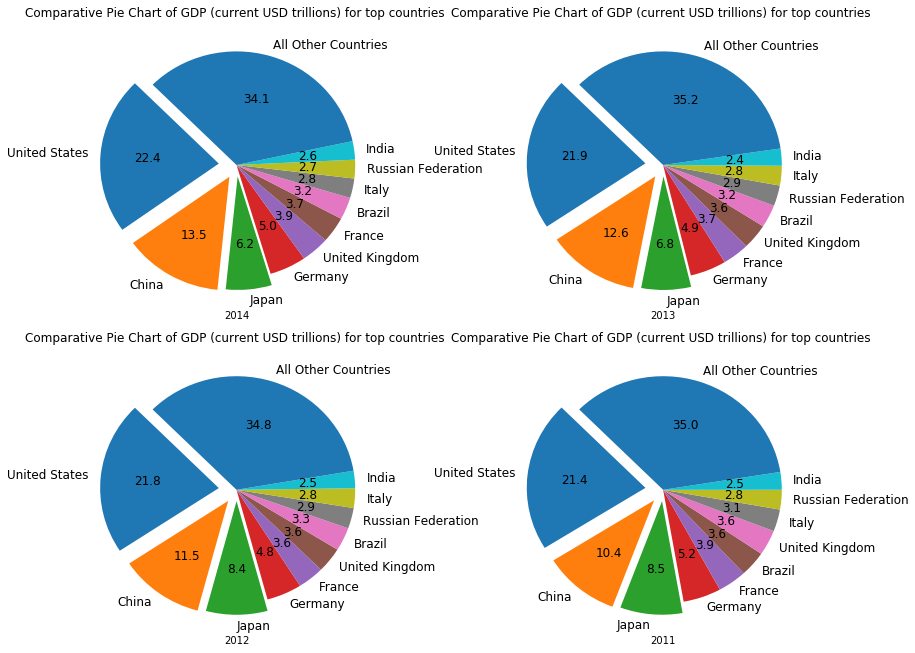

In [12]:
# draw pie chart for GDP (current USD trillions) for last four years

multiyearpie(4)
plt.tight_layout()

### World Map

In [13]:
# function to draw world map of GDP (current USD trillions) for a given year 

def worldmap(year):
    df = gdp_current_usd_metadata_merged[['Country Name','Country Code',year]]
     
    data = [ dict(
            type = 'choropleth',
            locations = df['Country Code'],
            z = df[year],
            text = df['Country Name'],
            colorscale = [[0,"rgb(0, 0, 0)"],[0.35,"rgb(40, 40, 40)"],[0.5,"rgb(80, 80, 80)"],\
                [0.6,"rgb(120, 120, 120)"],[0.7,"rgb(180, 180, 180)"],[1,"rgb(250, 250, 250)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(40,40,40)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                ticksuffix = 'kt',
                title = 'GDP <br>(in current USD trillions)'),
          ) ]

    layout = dict(
        title = ' Global GDP (current USD trillions) - ' + year,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return fig

In [14]:
# draw world map for GDP (current USD trillions) for 2014

fig = worldmap('2014')
py.iplot( fig, validate=False, filename='d3-world-map' )